In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from SINDy import *

(3, 100)


c:\Users\felip\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\felip\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


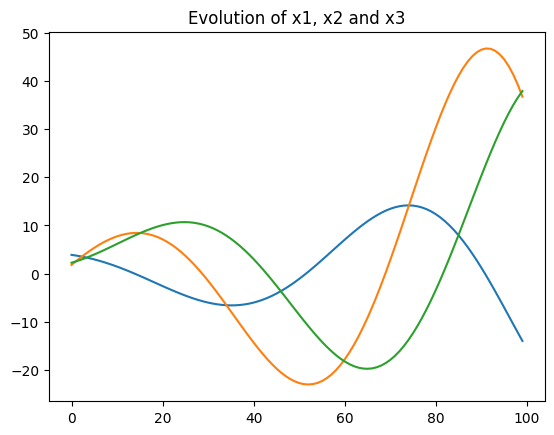

In [2]:
# define time and space domains
x10 = 4
x20 = 1
x30 = 2

def dx1_dt(x1,x2,x3):
    return -0.01*x1 -0.02*x2 -0.03*x3 + 0.01*1j*x1

def dx2_dt(x1,x2,x3):
    return 0.2*x1

def dx3_dt(x1,x2,x3):
    return 0.05*x1 + 0.05*x2

def generate_data():
    D = []
    x1 = x10
    x2 = x20
    x3 = x30
    for i in range(100):
        x1,x2,x3 = x1 + dx1_dt(x1,x2,x3), x2 + dx2_dt(x1,x2,x3), x3 + dx3_dt(x1,x2,x3)
        D.append([x1,x2,x3])
    D = np.array(D)
    return D.T

# combine signals and make data matrix
D = generate_data()

# create DMD input-output matrices
X = D[:,:-1]
Y = D[:,1:] - X

print(D.shape)

# print(f1.shape)

plt.title('Evolution of x1, x2 and x3')
plt.plot(D[0])
plt.plot(D[1])
plt.plot(D[2])
plt.show()

In [3]:
x1,x2,x3 = D[0,0:-1], D[1,0:-1], D[2,0:-1]
dx1, dx2, dx3 = D[0,1:]-x1, D[1,1:]-x2, D[2,1:]-x3

In [4]:
df = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'dx1':dx1,'dx2':dx2,'dx3':dx3})
df

for x in ['x1','x2','x3']:
    df[f'{x}^2'] = df[x]**2
    #df[f'j{x}'] = 1j*df[x]
for x in ['x1','x2','x3']:
    df[f'sin{x}'] = np.sin(df[x])
df['x1x2'] = df['x1']*df['x2']
df['x1x3'] = df['x1']*df['x3']
df['x2x3'] = df['x2']*df['x3']

df

,x1,x2,x3,dx1,dx2,dx3,x1^2,x2^2,x3^2,sinx1,sinx2,sinx3,x1x2,x1x3,x2x3
0,3.880000+ 0.040000j,1.800000+ 0.000000j,2.250000+ 0.000000j,-0.142700+0.038400j,0.776000+0.008000j,0.284000+0.002000j,15.052800+ 0.310400j,3.240000+ 0.000000j,5.062500+ 0.000000j,-0.673649- 0.029590j,9.738476e-01-0.000000e+ 00j,7.780732e-01-0.000000e+ 00j,6.984000+ 0.072000j,8.730000+ 0.090000j,4.050000+ 0.000000j
1,3.737300+ 0.078400j,2.576000+ 0.008000j,2.534000+ 0.002000j,-0.165697+0.036369j,0.747460+0.015680j,0.315665+0.004320j,13.961265+ 0.586009j,6.635712+ 0.041216j,6.421152+ 0.010136j,-0.562820- 0.064962j,5.359334e-01-6.754241e- 03j,5.708938e-01-1.642051e- 03j,9.626658+ 0.231857j,9.470161+ 0.206140j,6.527568+ 0.025424j
2,3.571603+ 0.114769j,3.323460+ 0.023680j,2.849665+ 0.006320j,-0.188823+0.033905j,0.714321+0.022954j,0.344753+0.006922j,12.743176+ 0.819819j,11.044826+ 0.157399j,8.120551+ 0.036020j,-0.419629- 0.104550j,-1.809171e-01-2.329164e- 02j,2.878046e-01-6.052647e- 03j,11.867362+ 0.466006j,10.177147+ 0.349626j,9.470598+ 0.088484j
3,3.382780+ 0.148674j,4.037781+ 0.046634j,3.194418+ 0.013242j,-0.211903+0.031011j,0.676556+0.029735j,0.371028+0.009765j,11.421097+ 1.005864j,16.301497+ 0.376594j,10.204132+ 0.084604j,-0.241501- 0.144903j,-7.818009e-01-2.913763e- 02j,-5.280556e-02-1.322436e- 02j,13.651991+ 0.758065j,10.804045+ 0.519724j,12.897742+ 0.202438j
4,3.170877+ 0.179685j,4.714337+ 0.076369j,3.565446+ 0.023008j,-0.234756+0.027694j,0.634175+0.035937j,0.394261+0.012803j,10.022177+ 1.139520j,22.219138+ 0.720055j,12.711877+ 0.164066j,-0.029755- 0.180576j,-1.002916e+00+1.488835e- 04j,-4.113849e-01-2.097375e- 02j,14.934861+ 1.089252j,11.301459+ 0.713613j,16.806956+ 0.380755j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-5.345312- 1.679603j,45.518048+16.597610j,29.417349+12.469321j,-1.722632-0.742689j,-1.069062-0.335921j,2.008637+0.745900j,25.751297+ 17.956003j,1796.412047+1510.981667j,709.896417+ 733.628747j,2.237436- 1.531102j,8.071493e+06+2.829829e+ 05j,-1.183901e+05-5.397867e+ 04j,-215.430788-165.171650j,-136.301406-116.061876j,1132.059350+1055.836865j
95,-7.067945- 2.422292j,44.448986+16.261690j,31.425985+13.215222j,-1.736857-0.768147j,-1.413589-0.484458j,1.869052+0.691970j,44.088342+ 34.241247j,1711.269784+1445.631247j,812.950466+ 830.602732j,-4.013933- 3.956293j,2.597040e+06+5.154830e+ 06j,2.759342e+03+2.743127e+ 05j,-274.772408-222.605132j,-190.105998-169.527358j,1181.951337+1098.442834j
96,-8.804801- 3.190439j,43.035397+15.777232j,33.295037+13.907192j,-1.739607-0.788904j,-1.760960-0.638088j,1.711530+0.629340j,67.345629+ 56.182358j,1603.124354+1357.958844j,915.149533+ 926.080935j,-7.071035+ 9.871669j,-2.885899e+06+2.077291e+ 06j,5.221671e+05-1.662946e+ 05j,-328.581834-276.217186j,-248.786150-228.675837j,1213.448166+1123.805029j
97,-10.544408- 3.979343j,41.274437+15.139144j,35.006567+14.536531j,-1.730448-0.804529j,-2.108882-0.795869j,1.536501+0.557990j,95.349373+ 83.919627j,1474.385446+1249.719264j,1014.149000+1017.748121j,24.073630+11.655382j,-7.894688e+05-1.704579e+ 06j,-4.463784e+05-9.263243e+ 05j,-374.970662-323.878439j,-311.277689-292.582246j,1224.805700+1129.956596j


In [5]:
target = 'dx1'
features = [col for col in df.columns if 'd' not in col]
features

columns_used, coef = sindy(df,features,target,cut_tol=0.005)

In [7]:
for i,feat in enumerate(columns_used):
    print(feat,np.round(coef[i],4))

x1 (-0.01+0.01j)
x2 (-0.02+0j)
x3 (-0.03+0j)


In [6]:
print(columns_used)
print(coef)

['x1', 'x2', 'x3']
[-0.01+0.01j -0.02+0.j   -0.03+0.j  ]
